## Cho dữ liệu poverty.txt
### Yêu cầu: Thực hiện thuật toán ADABoosting & thuật toán cơ sở/ XGBoost để từ Poverty Level => dự đoán Teen Birth Rate
1. Đọc dữ liệu, trực quan hóa dữ liệu.
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu đọc được là các cột 'PovPct', "Brth18to19", "ViolCrime", "TeenBrth" (inputs) và "Brth15to17" (outputs) với tỷ lệ dữ liệu test là 0.3
3. Áp dụng ADABoosting & thuật toán cơ sở/ XGBoost
4. Tìm kết quả
5. Vẽ hình. Nhận xét kết quả
6. Nếu 'PovPct', "Brth18to19", "ViolCrime", "TeenBrth" lần lượt là [[16, 100,10, 61]] => Brth15to17 là bao nhiêu?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("../../Data/poverty.txt", sep="\t")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    51 non-null     object 
 1   PovPct      51 non-null     float64
 2   Brth15to17  51 non-null     float64
 3   Brth18to19  51 non-null     float64
 4   ViolCrime   51 non-null     float64
 5   TeenBrth    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [3]:
data.head()

,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


In [4]:
data.corr()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
PovPct,1.000000,0.730293,0.649660,0.469564,0.703285
Brth15to17,0.730293,1.000000,0.942449,0.640274,0.978826
Brth18to19,0.649660,0.942449,1.000000,0.477704,0.988975
ViolCrime,0.469564,0.640274,0.477704,1.000000,0.557937
TeenBrth,0.703285,0.978826,0.988975,0.557937,1.000000


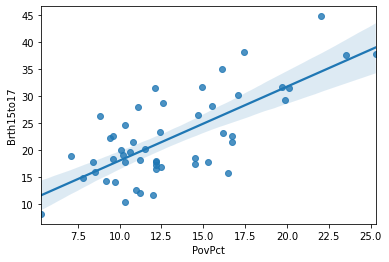

In [5]:
sns.regplot(data=data, x='PovPct', y='Brth15to17')
plt.show()

In [6]:
inputs = data[['PovPct', "Brth18to19", "ViolCrime", "TeenBrth"]]
inputs.head()

,PovPct,Brth18to19,ViolCrime,TeenBrth
0,20.1,88.7,11.2,54.5
1,7.1,73.7,9.1,39.5
2,16.1,102.5,10.4,61.2
3,14.9,101.7,10.4,59.9
4,16.7,69.1,11.2,41.1


In [7]:
outputs = data[['Brth15to17']]
outputs.head()

,Brth15to17
0,31.5
1,18.9
2,35.0
3,31.6
4,22.6


In [8]:
X_train, X_test, y_train, y_test = train_test_split(inputs, outputs, test_size=0.3)

## AdaBoost

In [9]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [10]:
ml = LinearRegression()
clf = AdaBoostRegressor(n_estimators=50, base_estimator=ml, learning_rate=1)

In [11]:
clf.fit(X_train, y_train)

c:\programdata\anaconda3\envs\ai_ocr\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


AdaBoostRegressor(base_estimator=LinearRegression(), learning_rate=1)

In [12]:
clf.score(X_train, y_train)

0.9894693148967819

In [13]:
clf.score(X_test, y_test)

0.9844639110225305

In [14]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(outputs, clf.predict(inputs)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(inputs, outputs))

Mean squared error: 0.74
Variance score: 0.99


In [15]:
# predict new sample
X_new = [[16, 100,10, 61]]
y_new = clf.predict(X_new)
y_new

array([34.69897975])

## XGBoost

In [16]:
import xgboost as xgb

In [17]:
xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [18]:
xgb_model.score(X_train, y_train)

0.9999999856860263

In [19]:
xgb_model.score(X_test, y_test)

0.9040523298350859

In [20]:
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(outputs, xgb_model.predict(inputs)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % xgb_model.score(inputs, outputs))

Mean squared error: 1.81
Variance score: 0.97
